In [1]:
import os
from PIL import Image
import flowers
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50



In [2]:
# load the images
os.listdir('flowers')

['dandelion', 'sunflower', 'rose', 'tulip', 'daisy']

In [3]:
categories = ['dandelion', 'sunflower', 'rose', 'tulip', 'daisy']

In [4]:
fnames = []
for category in categories:
    path = os.path.join('flowers',category)
    file_name = os.listdir(path)
    full_path = [os.path.join(path,name) for name in file_name]
    fnames.append(full_path)
            
    

In [5]:
images = []
count = 0
for names in fnames:
    one_category_image = [cv2.imread(name)for name in names if cv2.imread (name) is not None]
    count += 1
    print(count)
    images.append(one_category_image)

1
2
3
4
5


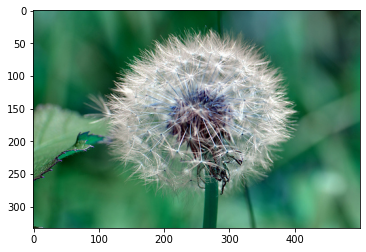

In [6]:
# Showing the sample 
plt.imshow(images[0][0])

In [7]:
img = cv2.cvtColor(images[0][0],cv2.COLOR_BGR2RGB)

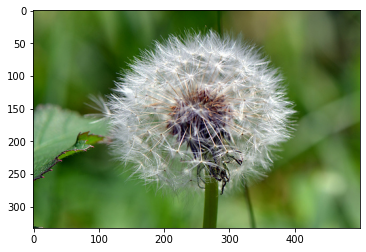

In [8]:
plt.imshow(img)

In [9]:
def converter(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [10]:
# resizing all images to 256*256
height = 256
width = 256
resized_images = []
for image_category in images:
    resized_images.append([cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)for img in image_category])




In [11]:
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [12]:
len_train_images = [len(imgs) for imgs in train_images]
train_categories = np.zeros(np.sum(len_train_images),dtype='uint8')
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
len_val_images = [len(imgs) for imgs in val_images]
# print(len_val_images)

# print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

In [13]:
## Convert the image data into the numpy array....
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)


In [14]:
print(type(train_images))

<class 'numpy.ndarray'>


In [15]:
## converting into the categorical types
train_labels = tf.keras.utils.to_categorical(train_categories,len(categories))
print(train_labels)
print(train_labels.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(3457, 5)


In [16]:
# Training RESNET 50
tf.keras.applications.ResNet50(include_top=True,weights="imagenet")

In [26]:
model = tf.keras.models.Sequential(
    [
        tf.keras.applications.ResNet50(include_top=True,weights="imagenet"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2048,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(5,activation='softmax')
    ])
model.layers[0].trainable = False

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              2050048   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [28]:
## Preparing the input data
batch_size = 32
epochs1 = 50
epochs2 = 10
epochs3 = 30

Training the Model Now

Fit the model with generator